In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt8 = "Simulate 4RMB at 100K, 200K, and 300K. Then, for each simulation, plot the radius of gyration over time and compare the secondary structure before and after the simulation."
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-08-19
time: 14:48:09
LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [3]:
agent.run(prompt8)

Thought: First, I need to download the PDB file for 4RMB.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "4RMB"
}
```PDB file found with this ID: 4RMB
Thought: Now, I need to set up and run a simulation for 4RMB at 100K, 200K, and 300K. I will use the SetUpandRunFunction tool to create a script for each temperature and then run the simulations.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "4RMB_144815",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "100 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 5000,
      "record_interval_steps": 100,
      

System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7f452cab6190> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...
Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...
Simulating...
Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_86/simulations/NVT_4RMB_144846_20240819_144855.py
['exp_10.ipynb', 'TRAJ_sim0_143106_1MBN_135410_20240819_143107.dcd', 'exp_13.ipynb', 'exp_22.ipynb', 'exp_8.ipynb', 'exp_3.ipynb', 'TOP_sim0_144855_4RMB_144846_20240819_144858.pdb', 'exp_17.ipynb', 'exp_1.ipynb', '.ipynb_checkpoints', 'LOG_sim0_144855_4RMB_144846_20240819_144858.txt', 'exp_4.ipynb', 'exp_24.ipynb', 'exp_12.ipynb', 'LOG_sim0_143106_1MBN_135410_20240819_143107.txt', 'LOG_sim0_133020_1MBN_133016_20240819_133021.txt', 'exp_19.ipynb', 'TRAJ_sim0_133020_1MBN_133016_20240819_133021.dcd', 'exp_9.ipynb', 'exp_5.ipynb',

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-08-19
time: 14:50:22


In [5]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 4RMB_144815: PDB file downloaded from RSCB
 PDBFile ID: 4RMB_144815
 4RMB_144846: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_144855: Initial positions for simulation sim0_144855
 sim0_144855: Basic Simulation of Protein 4RMB_144846
 rec0_144858: Simulation trajectory for protein 4RMB_144846 and simulation sim0_144855
 rec1_144858: Simulation state log for protein 4RMB_144846 and simulation sim0_144855
 rec2_144858: Simulation pdb frames for protein 4RMB_144846 and simulation sim0_144855
 rgy_rec0_144858: Radii of gyration per frame for rec0_144858
 fig0_144948: Plot of radii of gyration over time for rec0_144858
 rec0_144953: dssp values for trajectory with id: rec0_144858
 rec0_144957: dssp values for trajectory with id: rec0_144858


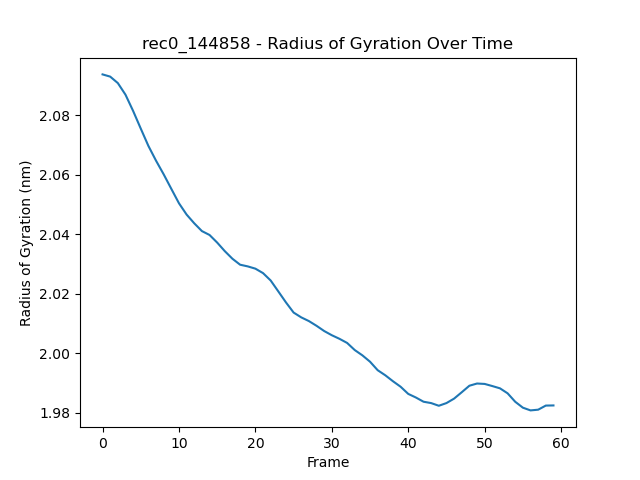

In [8]:
from IPython.display import Image
path_1 = registry.get_mapped_path("fig0_144948") + ".png"
# path_2 = registry.get_mapped_path("fig0_072038")
# path_3 = registry.get_mapped_path("fig0_072042")

Image(filename=path_1)

In [ ]:
# Image(filename=path_2)

In [ ]:
# Image(filename=path_3)

In [22]:
#secondary structure
import mdtraj as md

traj1 = "rec0_144858"
top1 = "top_sim0_144855"
traj = md.load_dcd(registry.get_mapped_path(traj1), top=registry.get_mapped_path(top1))
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj[-1],simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  4
Number of residues in sheets:  133
Number of residues in helices:  3
Number of residues in coils:  196


In [13]:
# #secondary structure
# traj2 = "rec0_144853"
# top2 = "top_sim0_144855"
# traj = md.load_dcd(registry.get_mapped_path(traj2), top=registry.get_mapped_path(top2))
# top = traj.topology
# number_of_chains = top.n_chains
# secondary_structure = md.compute_dssp(traj,simplified=True)
# print("Number of residues in chains: ",number_of_chains)
# print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
# print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
# print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

In [14]:
# #secondary structure
# traj3 = "rec0_071926"
# top3 = "top_sim0_071925"
# traj = md.load_dcd(registry.get_mapped_path(traj3), top=registry.get_mapped_path(top3))
# top = traj.topology
# number_of_chains = top.n_chains
# secondary_structure = md.compute_dssp(traj,simplified=True)
# print("Number of residues in chains: ",number_of_chains)
# print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
# print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
# print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

In [15]:
from mdagent.tools.base_tools.analysis_tools.secondary_structure import ComputeDSSP

In [16]:
dssp_tool = ComputeDSSP(path_registry=registry, simplified=True)

In [20]:
dssp1 = dssp_tool._run(traj_file="rec0_144858", top_file="top_sim0_144855", target_frames="last")
# dssp2 = dssp_tool._run(traj_file="rec0_071812", top_file="top_sim0_071811")
# dssp3 = dssp_tool._run(traj_file="rec0_071926", top_file="top_sim0_071925")

In [21]:
print(dssp1)
# print(dssp2)
# print(dssp3)

{'residues in helix': 3, 'residues in strand': 133, 'residues in coil': 196, 'residues not assigned, not a protein residue': 107}


# Experiment Result: ✅❌

### Completed without Exception or TimeOut Errors ❌
### Attempted all necessary steps ❌
### Completed without Hallucination ✅
### Logic make sense ❌
### Correct Answer ❌